In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

Aqui está um **Markdown** explicativo com o conceito de imagens como matrizes, pixels, escala de cinza, RGB, e um código didático usando `numpy` para gerar uma imagem fictícia:

---

# 📸 Imagens como Conjunto de Pixels e Matrizes

## O que é uma Imagem Digital?
Uma **imagem digital** é, essencialmente, uma **matriz de pixels**. Cada pixel (picture element) é a menor unidade da imagem e contém informações de cor ou intensidade.

### Imagem = Matriz Numérica
- Uma imagem pode ser representada como uma **matriz** onde cada elemento é um pixel.
- Em programação, especialmente com Python, usamos o pacote **NumPy** para manipular essas matrizes de forma eficiente.

---

## Representações de Imagem

### 1️⃣ **Escala de Cinza (Grayscale)**
- Uma imagem em **escala de cinza** possui apenas uma intensidade de luz por pixel.
- Cada pixel é representado por um valor único, geralmente de **0 a 255**:
  - `0` = Preto
  - `255` = Branco
  - Valores intermediários = Tons de cinza

🔹 **Formato da Matriz**: `(altura, largura)`  
Exemplo: uma imagem 5x5 seria uma matriz 5x5 com valores de 0 a 255.

---

### 2️⃣ **RGB (Red, Green, Blue)**
- Imagens coloridas são geralmente representadas no formato **RGB**.
- Cada pixel é composto por **3 canais**:
  - **R** (Vermelho)
  - **G** (Verde)
  - **B** (Azul)
- Cada canal varia de **0 a 255**, permitindo a combinação de cores.

🔹 **Formato da Matriz**: `(altura, largura, 3)`  
Exemplo: uma imagem 5x5 RGB seria uma matriz 5x5x3.

---



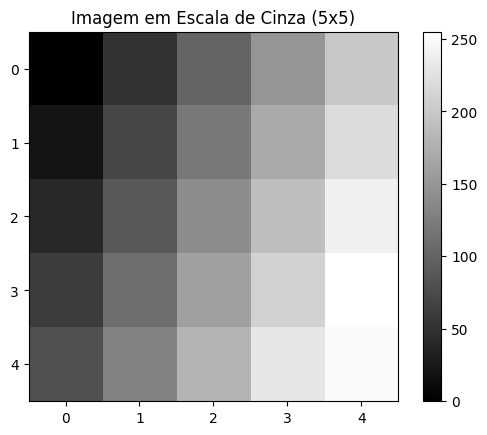

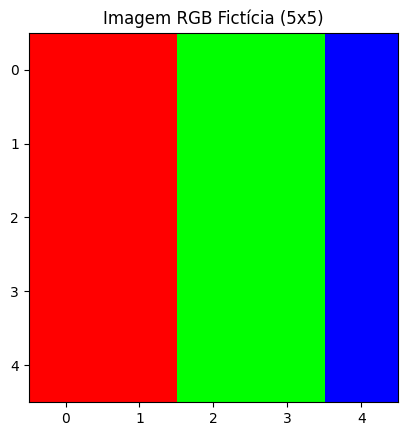

In [3]:

# 🎨 Criando uma imagem 5x5 em Escala de Cinza
imagem_gray = np.array([
    [  0,  50, 100, 150, 200],
    [ 20,  70, 120, 170, 220],
    [ 40,  90, 140, 190, 240],
    [ 60, 110, 160, 210, 255],
    [ 80, 130, 180, 230, 250]
], dtype=np.uint8)

# Exibindo a imagem em escala de cinza
plt.imshow(imagem_gray, cmap='gray')
plt.title('Imagem em Escala de Cinza (5x5)')
plt.colorbar()
plt.show()

# 🌈 Criando uma imagem 5x5 RGB (Vermelho, Verde e Azul)
imagem_rgb = np.zeros((5, 5, 3), dtype=np.uint8)

# Preenchendo com cores:
# Vermelho nos 2 primeiros pixels, Verde nos 2 seguintes e Azul no último
imagem_rgb[0, 0] = [255, 0, 0]   # Vermelho
imagem_rgb[0, 1] = [255, 0, 0]   # Vermelho
imagem_rgb[0, 2] = [0, 255, 0]   # Verde
imagem_rgb[0, 3] = [0, 255, 0]   # Verde
imagem_rgb[0, 4] = [0, 0, 255]   # Azul

# Repetindo a linha para preencher a matriz
for i in range(1, 5):
    imagem_rgb[i] = imagem_rgb[0]

# Exibindo a imagem RGB
plt.imshow(imagem_rgb)
plt.title('Imagem RGB Fictícia (5x5)')
plt.show()


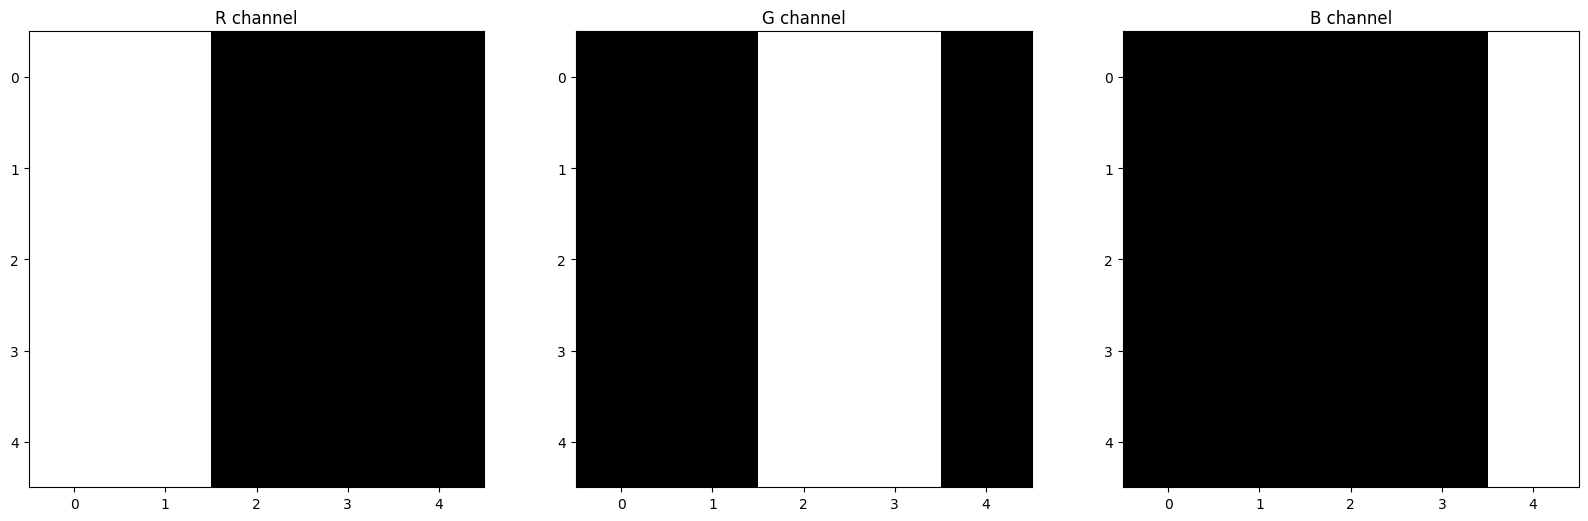

In [4]:
# Isolate RGB channels
r = imagem_rgb[:,:,0]
g = imagem_rgb[:,:,1]
b = imagem_rgb[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')


Aqui está um **Markdown didático sobre Equalização de Histograma** em processamento de imagens, conforme você pediu:

---

# 🎨 Equalização de Histograma no Processamento de Imagens

A **Equalização de Histograma** é uma técnica utilizada para **melhorar o contraste** de uma imagem, redistribuindo a intensidade dos pixels de forma mais uniforme.

---

## 💡 O que é um Histograma?
- Um **histograma** de imagem representa a **distribuição das intensidades** de pixel (tons de cinza ou cores).
- Em imagens em **escala de cinza**, o histograma mostra quantos pixels existem para cada valor entre **0 (preto)** e **255 (branco)**.
  
### 📊 Exemplo:
- Se muitos pixels estão concentrados em valores baixos (escuros), a imagem ficará "apagada".
- Se concentrados em valores altos, a imagem ficará muito clara.

---

## ✨ O que é Equalização de Histograma?
- A **equalização** "espalha" melhor os valores de intensidade no histograma, aproveitando toda a faixa de 0 a 255.
- Isso resulta em uma imagem com **mais contraste**, onde os detalhes ficam mais visíveis.

### 🎯 Antes e Depois:
| **Antes (Imagem Escura ou Clara)** | **Depois (Equalizada)** |
|------------------------------------|-------------------------|
| Contraste baixo                    | Contraste melhorado     |
| Histogramas concentrados           | Histograma mais distribuído |

---

## ⚙️ Como Funciona?
1. Calcula-se o **histograma cumulativo** da imagem.
2. Redistribui-se os níveis de cinza para que ocupem uma faixa mais ampla de valores.
3. Resultado: A imagem ganha contraste automaticamente.


---


## 🚨 Quando Usar Equalização?
| ✅ **Indicado para:**          | ⚠️ **Evitar em:**                  |
|-------------------------------|------------------------------------|
| Imagens muito escuras ou claras| Imagens já bem contrastadas        |
| Realce de detalhes ocultos     | Fotos coloridas sem adaptação      |
| Pré-processamento em visão computacional | Situações onde o brilho é intencional  |

---

## 🎯 Equalização em Imagens Coloridas
- Não é recomendado aplicar diretamente em imagens RGB.
- A abordagem correta é converter para o espaço de cores **YCrCb** ou **HSV**, aplicar a equalização apenas no canal de **luminância (Y)**, e depois reconverter.

```python
# Exemplo rápido
ycrcb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2YCrCb)
ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
equalized_rgb = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
```

---

## 🔧 Alternativa Melhor: **CLAHE**
- O **CLAHE** (Contrast Limited Adaptive Histogram Equalization) é uma versão **adaptativa** que evita exageros na equalização.
- Ideal para casos onde o contraste precisa ser melhorado de forma mais controlada.

```python
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(gray_image)
```

---



# 🎨 Filtros em Processamento de Imagens: Low Pass, High Pass e Detecção de Bordas

No processamento de imagens, **filtros** são usados para realçar ou suavizar determinadas características da imagem. Eles funcionam através da aplicação de **kernels (máscaras)**, que são pequenas matrizes deslizantes aplicadas sobre a imagem.

---

## 🔹 O que é um Kernel?
- Um **kernel** é uma matriz (geralmente 3x3 ou 5x5) que define como os pixels vizinhos serão combinados para modificar a imagem.
- A operação de aplicar um kernel sobre uma imagem é chamada de **convolução**.

---

## 1️⃣ **Filtro Low Pass (Passa-Baixa) — Suavização / Desfoque**
### ✨ Objetivo:
- Suavizar a imagem, reduzindo detalhes e **ruídos**.
- Deixa a imagem mais "borrada" (**blur**).

### 📏 Exemplo de Kernel 3x3 (Média Simples):

| 1/9  | 1/9  | 1/9  |
|------|------|------|
| 1/9  | 1/9  | 1/9  |
| 1/9  | 1/9  | 1/9  |

> 🔸 Esse kernel calcula a **média** dos pixels vizinhos, suavizando variações bruscas.

### 📌 Aplicações:
- Redução de ruído.
- Preparação para detecção de bordas (evita falsos positivos).

---

## 2️⃣ **Filtro High Pass (Passa-Alta) — Realce de Detalhes**
### ✨ Objetivo:
- Realçar **bordas** e detalhes finos da imagem.
- Destacar mudanças abruptas de intensidade.

### 📏 Exemplo de Kernel 3x3 (Filtro Clássico):

| -1   | -1   | -1   |
|------|------|------|
| -1   |  8   | -1   |
| -1   | -1   | -1   |

> 🔸 Esse kernel enfatiza as diferenças entre o pixel central e seus vizinhos, destacando transições rápidas — ou seja, detalhes e bordas.

### 📌 Aplicações:
- Realce de contornos.
- Destacar texturas e detalhes.

---

## 3️⃣ **Detecção de Bordas — Filtros de Gradiente**
### ✨ Objetivo:
- Identificar onde ocorrem **mudanças bruscas de intensidade** (as bordas dos objetos na imagem).

### 📏 Exemplos de Kernels — **Sobel Operator**

#### 🔹 Sobel X (Detecta Bordas Verticais):

| -1   |  0   |  1   |
|------|------|------|
| -2   |  0   |  2   |
| -1   |  0   |  1   |

#### 🔹 Sobel Y (Detecta Bordas Horizontais):

| -1   | -2   | -1   |
|------|------|------|
|  0   |  0   |  0   |
|  1   |  2   |  1   |

> 🔸 O filtro **Sobel** calcula o gradiente da imagem em cada direção (X e Y) para detectar bordas.

---

## 🚨 Resumo Comparativo

| Tipo de Filtro   | Função Principal         | Exemplo de Kernel           |
|------------------|--------------------------|-----------------------------|
| **Low Pass**     | Suavizar / Reduzir ruído | Todos os valores iguais     |
| **High Pass**    | Realçar detalhes         | Valor central alto e vizinhos negativos |
| **Bordas (Sobel)** | Detectar contornos     | Direcionais (X ou Y)        |

---


---

# 🎨 Threshold em Processamento de Imagens

O **Threshold** (ou **Limiarização**) é uma técnica fundamental em **visão computacional** e **processamento de imagens**, usada para **separar objetos do fundo** em uma imagem, transformando uma imagem em tons de cinza em uma imagem **binária**.

---

## 💡 O que é Threshold?

- Threshold é o processo de definir um **limiar (valor limite)** para decidir quais pixels da imagem serão considerados **brancos** e quais serão **pretos**.
- O objetivo é **simplificar** a imagem, destacando áreas de interesse e eliminando detalhes desnecessários.

---

## ⚙️ Como Funciona?

1. Para cada pixel da imagem em **escala de cinza**, compara-se sua intensidade com um valor fixo chamado de **limiar**.
2. A regra básica é:

```
Se a intensidade do pixel > limiar ➜ Pixel se torna Branco (255)
Se a intensidade do pixel <= limiar ➜ Pixel se torna Preto (0)
```

- O resultado é uma imagem **binária** (preto e branco).

---

## 🎯 Exemplo Conceitual:

| **Imagem em Escala de Cinza** | **Após Threshold** |
|-------------------------------|--------------------|
| Variação de tons (0 a 255)    | Apenas 0 e 255     |

Imagine uma imagem com tons de cinza onde você quer destacar apenas áreas mais claras ou mais escuras — o threshold faz exatamente isso.

---

## 🔹 Tipos de Threshold

### 1️⃣ **Threshold Fixo (Simples)**
- Define-se manualmente um valor de limiar, como **127**.
- É simples, mas pode não funcionar bem em imagens com variações de iluminação.

---

### 2️⃣ **Threshold Adaptativo**
- O limiar é calculado de forma dinâmica para diferentes regiões da imagem.
- Muito útil quando a iluminação não é uniforme.
- Exemplo: Imagens com sombras ou luzes variáveis.

---

### 3️⃣ **Otsu's Threshold**
- Método automático que calcula o melhor limiar com base na distribuição dos pixels.
- Ideal para imagens com histograma bimodal (dois picos de intensidade distintos).

---

## 📊 Aplicação do Threshold no Histograma

- Em um **histograma** de uma imagem em tons de cinza, o threshold funciona como uma **linha vertical** dividindo os pixels em dois grupos:
   - À esquerda da linha ➜ Pixels que viram **preto**.
   - À direita da linha ➜ Pixels que viram **branco**.

---

## 🚀 Para Que Serve o Threshold?

| **Aplicação**                | **Descrição**                                      |
|------------------------------|-----------------------------------------------------|
| **Segmentação de Objetos**   | Separar objetos do fundo                           |
| **Pré-processamento**        | Preparar a imagem para detecção de contornos        |
| **OCR (Reconhecimento de Texto)** | Facilitar a leitura de textos em imagens         |
| **Visão Computacional Industrial** | Detectar falhas, peças ou padrões simples     |

---

## ⚠️ Limitações do Threshold Simples
- Sensível à **iluminação desigual**.
- Difícil de aplicar em imagens complexas com muitos tons intermediários.
- Pode exigir ajustes finos no valor do limiar para cada imagem.

Por isso, em cenários mais avançados, o **threshold adaptativo** ou técnicas como **segmentação por cor** e **detecção de bordas** são utilizadas em conjunto.

### 🎨 Como Funciona o Método `cv2.threshold` no OpenCV

O método `cv2.threshold` é a implementação do OpenCV para aplicar **thresholding (limiarização)** em imagens. Ele é usado para transformar imagens em **binário** ou aplicar outras formas de limiarização.

---

## ⚙️ Sintaxe do `cv2.threshold`

```python
retval, dst = cv2.threshold(src, thresh, maxval, type)
```

| Parâmetro   | Descrição                                                                 |
|-------------|----------------------------------------------------------------------------|
| `src`       | A imagem de entrada (**obrigatoriamente em escala de cinza**)              |
| `thresh`    | Valor do **limiar** (threshold) que será usado para comparar os pixels     |
| `maxval`    | Valor que será atribuído ao pixel se a condição do threshold for satisfeita |
| `type`      | Tipo de threshold a ser aplicado (constantes do OpenCV)                    |
| `retval`    | Retorna o valor do threshold usado (útil no método de Otsu)                |
| `dst`       | A imagem resultante após a aplicação do threshold                          |

---

## 🔹 Tipos de Threshold (`type`)

O parâmetro `type` define **como** o threshold será aplicado. O OpenCV oferece várias opções:

| Constante                  | Descrição                                                                 |
|----------------------------|---------------------------------------------------------------------------|
| `cv2.THRESH_BINARY`        | Se pixel > limiar ➜ recebe `maxval`, senão recebe 0                      |
| `cv2.THRESH_BINARY_INV`    | Inverso do BINÁRIO                                                        |
| `cv2.THRESH_TRUNC`         | Se pixel > limiar ➜ recebe o valor do limiar, senão permanece igual       |
| `cv2.THRESH_TOZERO`        | Se pixel > limiar ➜ permanece igual, senão vira 0                         |
| `cv2.THRESH_TOZERO_INV`    | Inverso do TOZERO                                                         |

---

## 🎯 Exemplos Conceituais

### 1️⃣ `cv2.THRESH_BINARY`  
> Se a intensidade do pixel for **maior que o limiar**, o pixel vira `maxval` (geralmente 255). Caso contrário, vira 0.

| **Pixel** | **Resultado**  |
|-----------|----------------|
| > limiar  | 255            |
| <= limiar | 0              |

---

### 2️⃣ `cv2.THRESH_TRUNC`  
> Todos os valores acima do limiar são **reduzidos ao valor do limiar**.

| **Pixel** | **Resultado**     |
|-----------|-------------------|
| > limiar  | limiar            |
| <= limiar | valor original    |

---

## 🔹 Threshold Automático (Otsu)

- Você pode usar o método de **Otsu** para calcular automaticamente o melhor limiar.
- Basta passar:

```python
cv2.threshold(src, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
```

O OpenCV ignora o valor do `thresh` e calcula o ideal com base no histograma da imagem.

---

## 🚨 Resumo das Configurações

| **Tipo**               | **Descrição**                              |
|------------------------|--------------------------------------------|
| `THRESH_BINARY`        | Binário simples                            |
| `THRESH_BINARY_INV`    | Binário invertido                          |
| `THRESH_TRUNC`         | Trunca valores acima do limiar             |
| `THRESH_TOZERO`        | Zera valores abaixo do limiar              |
| `THRESH_OTSU`          | Calcula o limiar ideal automaticamente     |

---

## 💡 Observações Finais
- O `cv2.threshold` **sempre retorna duas coisas**: o valor do limiar usado (`retval`) e a imagem resultante.
- Funciona **apenas com imagens em escala de cinza**.
- Em cenários com iluminação irregular, prefira o `cv2.adaptiveThreshold`.


---

## 🎓 Explicação Didática: O que é Detecção de Cantos (Corners)?

### 💡 Conceito Intuitivo:
- Um **canto (corner)** é um ponto onde a imagem muda de forma significativa em **duas direções**.
- Diferente das **bordas**, que mudam em apenas **uma direção** (horizontal ou vertical).

---

### 📊 Relação com Sobel X e Sobel Y:
- O filtro **Sobel X** detecta variações **horizontais**.
- O filtro **Sobel Y** detecta variações **verticais**.
- Se um ponto tem **alta resposta** nos dois filtros ➜ Provavelmente é um **canto**.

---

## 🔹 Explicação Final:

> 🔹 **Sobel X** detecta bordas verticais.  
> 🔹 **Sobel Y** detecta bordas horizontais.  
> ➡️ Onde temos resposta forte em **ambos** ➜ O algoritmo de Harris detecta como **canto**.  
> Por isso vemos esses pontos vermelhos destacados.


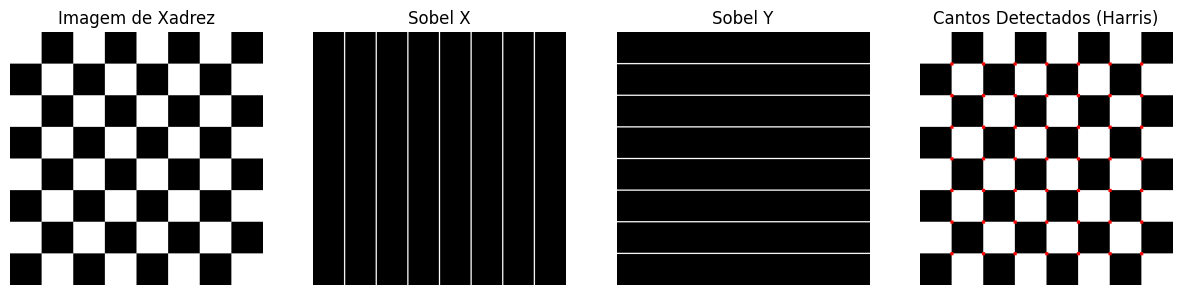

In [6]:

# 📌 Função para gerar uma imagem de xadrez
def generate_chessboard(square_size=50, num_squares=8):
    img_size = square_size * num_squares
    chessboard = np.zeros((img_size, img_size), dtype=np.uint8)
    
    for i in range(num_squares):
        for j in range(num_squares):
            if (i + j) % 2 == 0:
                chessboard[i*square_size:(i+1)*square_size, j*square_size:(j+1)*square_size] = 255
    return chessboard

# 📌 Função Sobel
def detect_sobel(image_gray):
    sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)
    sobely = cv2.convertScaleAbs(sobely)
    return sobelx, sobely

# 📌 Função Harris
def detect_corners(image_gray):
    gray_float = np.float32(image_gray)
    corners = cv2.cornerHarris(gray_float, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    # Converter para BGR para visualizar as marcações
    corner_img = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
    corner_img[corners > 0.01 * corners.max()] = [255, 0, 0]  # Marca os cantos em vermelho
    return corner_img

# 🎲 Gerar imagem de xadrez
gray_chessboard = generate_chessboard()

# Aplicar filtros
sobelx, sobely = detect_sobel(gray_chessboard)
corner_img = detect_corners(gray_chessboard)

# 📊 Exibir Comparação Didática
plt.figure(figsize=(15,5))

plt.subplot(1, 4, 1)
plt.imshow(gray_chessboard, cmap='gray')
plt.title('Imagem de Xadrez')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(corner_img)
plt.title('Cantos Detectados (Harris)')
plt.axis('off')

plt.show()


# 🚗 Detecção e Matching de Carros em Imagens Aéreas com ORB

## 🎯 Por que Escolher o ORB para Este Projeto?

No contexto deste projeto, o objetivo é **detectar e fazer o matching de carros** que aparecem como **pequenos retângulos** em imagens aéreas. Para essa tarefa, a escolha do algoritmo de extração de features é crucial para garantir **eficiência**, **precisão aceitável** e **baixo custo computacional**.

Após analisar diferentes algoritmos, o **ORB (Oriented FAST and Rotated BRIEF)** foi escolhido pelas seguintes razões:

---

## 🔹 Vantagens do ORB no Contexto de Imagens Aéreas

| **Critério**              | **Motivo da Escolha do ORB**                                                                 |
|----------------------------|-----------------------------------------------------------------------------------------------|
| **Eficiência e Velocidade** | ORB é extremamente rápido e leve, ideal para processar grandes imagens ou muitas imagens em sequência. |
| **Invariância à Rotação**  | Como as imagens aéreas podem ter carros orientados em diferentes ângulos, o ORB lida bem com essa variação. |
| **Descritores Binários**   | Os descritores do ORB são compactos (binários), permitindo matching rápido e com menos consumo de memória. |
| **Open Source**            | ORB é totalmente livre, sem restrições de patente, ao contrário de algoritmos como SIFT e SURF. |
| **Bom Custo-Benefício**    | Apesar de não ser o mais robusto em todos os cenários, o ORB oferece uma excelente relação entre desempenho e precisão. |

---

## ⚠️ Considerações Técnicas sobre o Cenário

- **Carros Pequenos (Retângulos Simples):**
  - Em imagens aéreas, os carros aparecem como formas geométricas simples, com poucos detalhes.
  - O ORB consegue identificar **padrões de cantos** e bordas, mesmo em objetos pequenos, desde que haja contraste suficiente.

- **Desvantagens Controladas:**
  - Embora o ORB não seja totalmente invariante à escala, nesse caso as imagens já possuem uma escala relativamente fixa (altitude constante do drone/satélite).
  - Variações de iluminação e ruído são minimizadas com pré-processamentos simples (ex: equalização de histograma ou filtros suavizadores).

---

## 🆚 Por Que Não SIFT ou HOG?

| **Algoritmo** | **Motivo da Não Escolha**                                                                 |
|---------------|--------------------------------------------------------------------------------------------|
| **SIFT**      | Alta robustez, mas é **lento** e gera descritores pesados (float). Exagero para formas simples e pequenas como os carros vistos de cima. |
| **HOG**       | Excelente para detectar formas humanas ou veículos em perspectiva lateral, mas menos eficiente para pequenos retângulos em imagens aéreas. Além disso, o HOG é mais usado com classificadores como SVM, não sendo ideal para matching direto. |
| **SURF**      | Mais rápido que SIFT, porém ainda pesado e com restrições de licença em algumas versões.    |

---

## 🚀 Conclusão

O **ORB** foi a escolha ideal para este projeto devido à sua:
- **Alta performance em tempo de execução**.
- Capacidade de lidar com **variações de rotação**.
- Eficiência no matching graças aos seus **descritores binários**.
- Compatibilidade com cenários onde objetos são simples e pequenos, como carros em imagens aéreas.

Essa abordagem permite realizar o **matching eficiente entre imagens de referência e imagens de consulta**, identificando padrões de veículos de forma rápida e prática.

---

## 📌 Próximos Passos

- Aplicar **filtros de pré-processamento** para melhorar o contraste dos veículos.
- Ajustar parâmetros do ORB para otimizar o número de keypoints detectados.
- Implementar um filtro espacial para garantir que os matches ocorram apenas em regiões esperadas da imagem (zonas urbanas, estacionamentos, etc).
- Explorar técnicas adicionais como **clustering dos keypoints** para agrupar possíveis detecções de veículos.

